### What is Cache-Augmented Generation (CAG)?
CAG is a retrieval-free approach that bypasses the usual step of querying external knowledge sources at inference time. Instead, it preloads relevant documents into the LLM's extended context window, precomputes the model’s key‑value (KV) cache, and reuses this during inference—so the model can generate responses without additional retrieval steps 

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

from langchain.chat_models import init_chat_model

llm=init_chat_model("openai:gpt-4o-mini")

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x00000217B9B4CA50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000217B9B4CE10>, root_client=<openai.OpenAI object at 0x00000217B9B4C7D0>, root_async_client=<openai.AsyncOpenAI object at 0x00000217B9B4CB90>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [12]:
### Cache variable
Model_Cache={}

In [15]:
import time

def cache_model(query):
    start_time=time.time()
    if Model_Cache.get(query):
        print("**CAche Hit**")
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        return Model_Cache.get(query)
    else:
        print("***CACHE MISS – EXECUTING MODEL***")
        start_time = time.time()
        response = llm.invoke(query)
        end_time = time.time()
        elapsed = end_time - start_time
        print(f"EXECUTION TIME: {elapsed:.2f} seconds")
        Model_Cache[query] = response
        return response


In [16]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C2CUlo0Vqh6oEZAqKRETKWuH8QkTp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e7476b7-8724-4a40-b167-815538814757-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [17]:
Model_Cache

{'hi': AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C2CUlo0Vqh6oEZAqKRETKWuH8QkTp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e7476b7-8724-4a40-b167-815538814757-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [18]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C2CUlo0Vqh6oEZAqKRETKWuH8QkTp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e7476b7-8724-4a40-b167-815538814757-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 17.24 seconds
content="LangGraph is an innovative framework that seeks to improve language modeling and understanding by leveraging the power of graph-based representations. In recent years, the understanding of how language functions has witnessed a significant evolution, necessitating more sophisticated and nuanced approaches to handle the complexities of human communication. LangGraph aims to bridge this gap by modeling language as a network of interconnected concepts, rather than as a mere sequence of words.\n\nAt the core of LangGraph is the idea that language can be represented as a graph, where nodes correspond to words, phrases, or even larger semantic units, and edges represent the relationships between them. This graphical representation allows for a more holistic approach to understanding the meaning of texts, as it captures not only the syntactical relationships but also the semantic connections that exist among various com

In [20]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

**CAche Hit**
EXECUTION TIME: 0.00 seconds
content="LangGraph is an innovative framework that seeks to improve language modeling and understanding by leveraging the power of graph-based representations. In recent years, the understanding of how language functions has witnessed a significant evolution, necessitating more sophisticated and nuanced approaches to handle the complexities of human communication. LangGraph aims to bridge this gap by modeling language as a network of interconnected concepts, rather than as a mere sequence of words.\n\nAt the core of LangGraph is the idea that language can be represented as a graph, where nodes correspond to words, phrases, or even larger semantic units, and edges represent the relationships between them. This graphical representation allows for a more holistic approach to understanding the meaning of texts, as it captures not only the syntactical relationships but also the semantic connections that exist among various components of language. F

In [21]:
query="give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 12.18 seconds
content='LangGraph is an innovative concept that sits at the intersection of natural language processing (NLP) and graph-based representation of information. It enables more effective modeling and understanding of relationships, concepts, and data found in various forms of human language. As the demand for advanced language understanding has increased, LangGraph offers a new avenue for researchers, developers, and businesses aiming to harness the power of language data.\n\nAt its core, LangGraph uses graph theory to represent linguistic elements, treating words, phrases, and concepts as nodes, and the relationships between them as edges. This structure enables the visualization of intricate relationships within a body of text or between different texts. Traditional NLP methods often rely on linear models and vector space representations, which can limit the understanding of nuanced relationships inherent in natural langua

### Advanced CAG

In [22]:
from __future__ import annotations
from typing import TypedDict, List, Optional
import time

# ---- LangGraph / LangChain ----
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

from langchain_core.documents import Document
from langchain_openai import ChatOpenAI
from langchain.embeddings import HuggingFaceEmbeddings

# ---- FAISS vector stores ----
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [24]:
# ================= CONFIG =================
EMBED_MODEL = "sentence-transformers/all-MiniLM-L6-v2"  # 384-dim
VECTOR_DIM = 384

LLM_MODEL = "gpt-4o-mini"
LLM_TEMPERATURE = 0

RETRIEVE_TOP_K = 4
CACHE_TOP_K = 3

CACHE_DISTANCE_THRESHOLD = 0.45

# Optional TTL for cache entries (seconds). 0 = disabled.
CACHE_TTL_SEC = 0


In [25]:
# ================= STATE ==================
class RAGState(TypedDict):
    question: str
    normalized_question: str
    context_docs: List[Document]
    answer: Optional[str]
    citations: List[str]
    cache_hit: bool

In [27]:
# ============== GLOBALS ===================
from langchain_huggingface import HuggingFaceEmbeddings
EMBED = HuggingFaceEmbeddings(model_name=EMBED_MODEL)

In [28]:
# ----- QA CACHE (EMPTY, SAFE INIT) -----
qa_index = faiss.IndexFlatL2(VECTOR_DIM)  # distance; lower is better
QA_CACHE = FAISS(
    embedding_function=EMBED,
    index=qa_index,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)

In [29]:
QA_CACHE

In [30]:
# ----- RAG STORE (demo only) -----
RAG_STORE = FAISS.from_texts(
    texts=[
        "LangGraph lets you compose stateful LLM workflows as graphs.",
        "In LangGraph, nodes can be cached; node caching memoizes outputs keyed by inputs for a TTL.",
        "Retrieval-Augmented Generation (RAG) retrieves external context and injects it into prompts.",
        "Semantic caching reuses prior answers when new questions are semantically similar."
    ],
    embedding=EMBED,
)

In [31]:
LLM = ChatOpenAI(model=LLM_MODEL, temperature=LLM_TEMPERATURE)

In [34]:
LLM


ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x00000218F89F4510>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000218F89F48A0>, root_client=<openai.OpenAI object at 0x00000218F89F42B0>, root_async_client=<openai.AsyncOpenAI object at 0x00000218F89F4640>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [35]:
# ================ NODES ===================
def normalize_query(state: RAGState) -> RAGState:
    q = (state["question"] or "").strip()
    state["normalized_question"] = q.lower()
    return state

def semantic_cache_lookup(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    state["cache_hit"] = False  # default

    if not q:
        return state

    # ✅ Guard: FAISS crashes if ntotal == 0 and you ask for k>0
    if getattr(QA_CACHE, "index", None) is None or QA_CACHE.index.ntotal == 0:
        return state

    # For FAISS L2 wrapper, this returns (Document, distance) with lower=better
    hits = QA_CACHE.similarity_search_with_score(q, k=CACHE_TOP_K)
    if not hits:
        return state

    best_doc, dist = hits[0]

    # Optional TTL
    if CACHE_TTL_SEC > 0:
        ts = best_doc.metadata.get("ts")
        if ts is None or (time.time() - float(ts)) > CACHE_TTL_SEC:
            return state

    # L2 distance gate (lower = more similar)
    if dist <= CACHE_DISTANCE_THRESHOLD:
        cached_answer = best_doc.metadata.get("answer")
        if cached_answer:
            state["answer"] = cached_answer
            state["citations"] = ["(cache)"]
            state["cache_hit"] = True

    return state

def respond_from_cache(state: RAGState) -> RAGState:
    return state

def retrieve(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    docs = RAG_STORE.similarity_search(q, k=RETRIEVE_TOP_K)
    state["context_docs"] = docs
    return state

def generate(state: RAGState) -> RAGState:
    q = state["question"]
    docs = state.get("context_docs", [])
    ctx = "\n\n".join([f"[doc-{i}] {d.page_content}" for i, d in enumerate(docs, start=1)])

    system = (
        "You are a precise RAG assistant. Use the context when helpful. "
        "Cite with [doc-i] markers if you use a fact from the context."
    )
    user = f"Question: {q}\n\nContext:\n{ctx}\n\nWrite a concise answer with citations."

    resp = LLM.invoke([{"role": "system", "content": system},
                       {"role": "user", "content": user}])
    state["answer"] = resp.content
    state["citations"] = [f"[doc-{i}]" for i in range(1, len(docs) + 1)]
    return state

def cache_write(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    a = state.get("answer")
    if not q or not a:
        return state

    QA_CACHE.add_texts(
        texts=[q],
        metadatas=[{
            "answer": a,
            "ts": time.time(),
        }]
    )
    return state

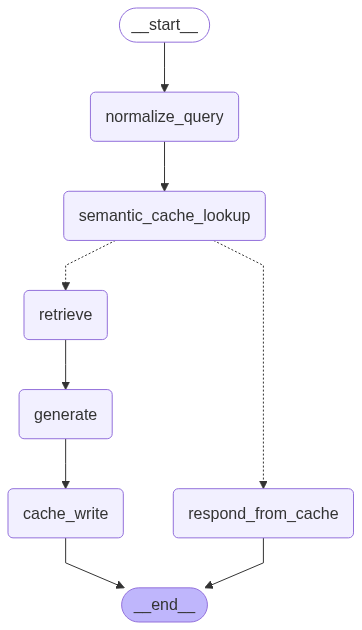

In [36]:
# ============== GRAPH WIRING ==============
graph = StateGraph(RAGState)

graph.add_node("normalize_query", normalize_query)
graph.add_node("semantic_cache_lookup", semantic_cache_lookup)
graph.add_node("respond_from_cache", respond_from_cache)
graph.add_node("retrieve", retrieve)
graph.add_node("generate", generate)
graph.add_node("cache_write", cache_write)

graph.set_entry_point("normalize_query")
graph.add_edge("normalize_query", "semantic_cache_lookup")

def _branch(state: RAGState) -> str:
    return "respond_from_cache" if state.get("cache_hit") else "retrieve"

graph.add_conditional_edges(
    "semantic_cache_lookup",
    _branch,
    {
        "respond_from_cache": "respond_from_cache",
        "retrieve": "retrieve"
    }
)

graph.add_edge("respond_from_cache", END)
graph.add_edge("retrieve", "generate")
graph.add_edge("generate", "cache_write")
graph.add_edge("cache_write", END)

memory = MemorySaver()
app = graph.compile(checkpointer=memory)
app

In [37]:
# ================= DEMO ===================
if __name__ == "__main__":
    thread_cfg = {"configurable": {"thread_id": "demo-user-1"}}

    q1 = "What is LangGraph ?"
    out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
    print("Answer:", out1["answer"])
    print("Citations:", out1.get("citations"))
    print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that allows users to compose stateful workflows for large language models (LLMs) in the form of graphs, enabling the management of complex interactions and processes [doc-2]. It also features node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL) [doc-1].
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [38]:
q1 = "Explain about LangGraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that allows users to compose stateful workflows for large language models (LLMs) in the form of graphs, enabling the management of complex interactions and processes [doc-2]. It also features node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL) [doc-1].
Citations: ['(cache)']
Cache hit?: True


In [39]:
q1 = "Explain about LangGraph agents ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are part of a framework that allows users to compose stateful workflows using large language models (LLMs) represented as graphs [doc-2]. These agents can utilize features like node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL) [doc-1]. Additionally, they can leverage retrieval-augmented generation (RAG) to fetch external context and incorporate it into prompts, enhancing the quality of responses [doc-3]. Furthermore, LangGraph supports semantic caching, which enables the reuse of previous answers when new queries are semantically similar, improving efficiency and response time [doc-4].
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [40]:
q1 = "Explain about agents in Langgraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are part of a framework that allows users to compose stateful workflows using large language models (LLMs) represented as graphs [doc-2]. These agents can utilize features like node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL) [doc-1]. Additionally, they can leverage retrieval-augmented generation (RAG) to fetch external context and incorporate it into prompts, enhancing the quality of responses [doc-3]. Furthermore, LangGraph supports semantic caching, which enables the reuse of previous answers when new queries are semantically similar, improving efficiency and response time [doc-4].
Citations: ['(cache)']
Cache hit?: True
